jy# DAVE3625 Assignment 2 This assignment is solved by Uy Quoc Nguyen (s341864) and Anders Hagen Ottersland (s341883).

Assignment 2: Machine Learning
You have 10 days to work on a machine learning algorithm. I want you to pick one of the following use cases and make a prediction algorithm using either regression or classification algorithms.

Do the following:

Pick one use case (defined below).

1. Explore and research which algorithm would work best for this use case (regression or classification)
2. Document your findings in a file (3-5 lines) on why you chose this algorithm.
3. Train the algorithm using Python
4. Keep the solution as simple as possible. We are not looking for the best machine learning algorithm. We are interested in 
5. seeing that you know how to work with machine learning.
6. Publish the code on GitHub and send us the link

We picked the following case:

Predict stock market price for TESLA. I want you to make a prediction algorithm which predicts the price of this stock on a specific date. Input will be date and output should be price of that stock (close value in the data file). You should also show the prediction percentage score. Data file: TESLA.csv For updated csv file, please download the data from: https://finance.yahoo.com/quote/TSLA/history?p=TSLA.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans2, whiten

In [2]:
url = 'https://raw.githubusercontent.com/PandersPanda/dave3625-assignment2/main/TSLA.csv'
df = pd.read_csv(url, sep=',')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,446.239990,447.000000,428.869995,430.829987,430.829987,36287800
1,2020-10-20,431.750000,431.750000,419.049988,421.940002,421.940002,31656300
2,2020-10-21,422.700012,432.950012,421.250000,422.640015,422.640015,32370500
3,2020-10-22,441.920013,445.230011,424.510010,425.790009,425.790009,39993200
4,2020-10-23,421.839996,422.890015,407.380005,420.630005,420.630005,33717000
...,...,...,...,...,...,...,...
246,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
247,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
248,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100
249,2021-10-14,815.489990,820.250000,813.349976,818.320007,818.320007,12247200


In [3]:
#We observe that the data is already sortet by date
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.994404,0.992779,0.985837,0.985837,-0.172981
High,0.994404,1.000000,0.991531,0.994441,0.994441,-0.135574
Low,0.992779,0.991531,1.000000,0.992556,0.992556,-0.222017
Close,0.985837,0.994441,0.992556,1.000000,1.000000,-0.155263
Adj Close,0.985837,0.994441,0.992556,1.000000,1.000000,-0.155263
Volume,-0.172981,-0.135574,-0.222017,-0.155263,-0.155263,1.000000


In [4]:
#We need to change the date to numeric to get a correllation
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_numeric(df['Date'])
df['Date']

0      1603065600000000000
1      1603152000000000000
2      1603238400000000000
3      1603324800000000000
4      1603411200000000000
              ...         
246    1633910400000000000
247    1633996800000000000
248    1634083200000000000
249    1634169600000000000
250    1634256000000000000
Name: Date, Length: 251, dtype: int64

In [5]:
df.corr()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.426996,0.412411,0.452799,0.427241,0.427241,-0.474706
Open,0.426996,1.000000,0.994404,0.992779,0.985837,0.985837,-0.172981
High,0.412411,0.994404,1.000000,0.991531,0.994441,0.994441,-0.135574
Low,0.452799,0.992779,0.991531,1.000000,0.992556,0.992556,-0.222017
Close,0.427241,0.985837,0.994441,0.992556,1.000000,1.000000,-0.155263
Adj Close,0.427241,0.985837,0.994441,0.992556,1.000000,1.000000,-0.155263
Volume,-0.474706,-0.172981,-0.135574,-0.222017,-0.155263,-0.155263,1.000000


<AxesSubplot:xlabel='Date', ylabel='Close'>

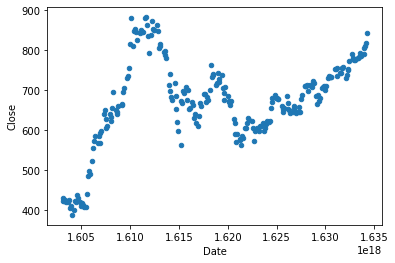

In [6]:
#Plot the data with the x-value as the date
df.plot.scatter(x = 'Date', y = 'Close')

In [7]:
x = df.values
scaler = preprocessing.MinMaxScaler().fit(x)
x = scaler.transform(x)
df = pd.DataFrame(x)
df

,0,1,2,3,4,5,6
0,0.00000,0.105030,0.081107,0.101038,0.086436,0.086436,0.124748
1,0.00277,0.075898,0.050201,0.081098,0.068478,0.068478,0.102935
2,0.00554,0.057702,0.052633,0.085565,0.069892,0.069892,0.106299
3,0.00831,0.096345,0.077520,0.092185,0.076255,0.076255,0.142200
4,0.01108,0.055973,0.032244,0.057402,0.065832,0.065832,0.112640
...,...,...,...,...,...,...,...
246,0.98892,0.791447,0.799035,0.825174,0.815877,0.815877,0.020721
247,0.99169,0.818147,0.821491,0.847652,0.843713,0.843713,0.057550
248,0.99446,0.837328,0.827753,0.866353,0.854540,0.854540,0.020344
249,0.99723,0.847420,0.837562,0.881723,0.869165,0.869165,0.011523


In [8]:
#Date is now in x=0 and close in x=4
x = df.values
x = scaler.inverse_transform(x)
df = pd.DataFrame(x)
df

,0,1,2,3,4,5,6
0,1.603066e+18,446.239990,447.000000,428.869995,430.829987,430.829987,36287800.0
1,1.603152e+18,431.750000,431.750000,419.049988,421.940002,421.940002,31656300.0
2,1.603238e+18,422.700012,432.950012,421.250000,422.640015,422.640015,32370500.0
3,1.603325e+18,441.920013,445.230011,424.510010,425.790009,425.790009,39993200.0
4,1.603411e+18,421.839996,422.890015,407.380005,420.630005,420.630005,33717000.0
...,...,...,...,...,...,...,...
246,1.633910e+18,787.650024,801.239990,785.500000,791.940002,791.940002,14200300.0
247,1.633997e+18,800.929993,812.320007,796.570007,805.719971,805.719971,22020000.0
248,1.634083e+18,810.469971,815.409973,805.780029,811.080017,811.080017,14120100.0
249,1.634170e+18,815.489990,820.250000,813.349976,818.320007,818.320007,12247200.0


In [9]:
#Lets try to train our model
#We want to predict the value in Close
X = pd.DataFrame(df[0]) #Date
y = pd.DataFrame(df[4]) #Close

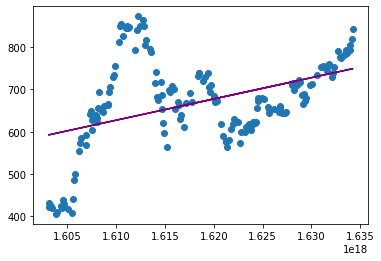

MSE = 9340.523978557907


In [10]:
#Splitting the set in training and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)  
Y_pred = linear_regressor.predict(X_train)


plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color='purple')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))

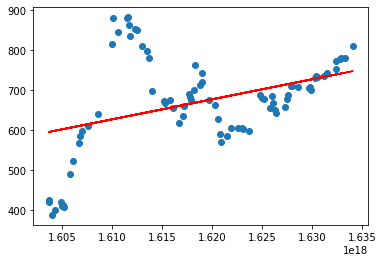

MSE = 11578.08055832203


In [11]:
Y_pred = linear_regressor.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

In [16]:
#Lets test with a new Date:
Date = "2021-10-18"
d = pd.Series([Date])
d = pd.to_datetime(d)
d = pd.to_numeric(d)

linear_regressor.predict([[d[0]]])
#We observe that regression is not accurate since the MSE is high

2021-10-18


array([[750.36932731]])